<a href="https://colab.research.google.com/github/86lekwenshiung/Neural-Network-with-Tensorflow/blob/main/03_Convultional_Neural_Network_(CNN)_With_Tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 CNN & Computer Vision with Tensorflow
___

CNN is a special kind of neural network and could be used for computer vision. Simplifying Computer Vision Problem :
 - Detecting patterns in visual data (image , video)
 - Classification of visual data (image , video)
 - Object detection

For example : camera of a self driving car recognising the object in its path

**Components of a convolutional neural network:**

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*
<br> **Source : ZTM TensorFlow Developer Certificate in 2021**

**Recap of the hidden activation layer**
___

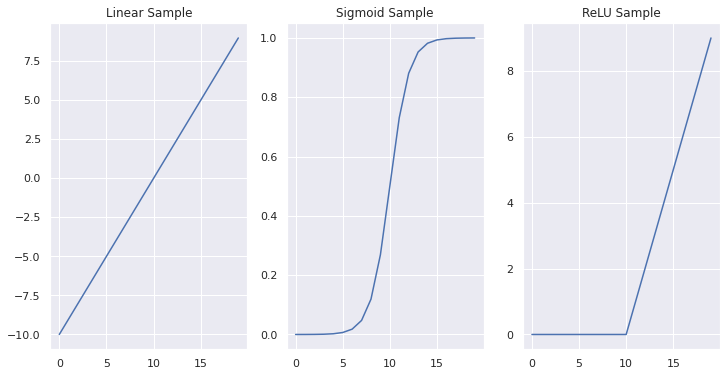

In [19]:
import tensorflow as tf
# Passing a linear range
sample_linear = tf.range(-10,10 , dtype = tf.float32)

# 
def sigmoid(x):
  return 1/(1+tf.exp(-x))

def relu(x):
  return tf.maximum(0 , x)

# Passing linear range via the sigmoid and relu function
sample_sigmoid = sigmoid(sample_linear)
sample_relu = relu(sample_linear)

plt.figure(figsize = (12 , 6))

# Linear Activation - Same as Linear line
plt.subplot(1,3,1)
plt.plot(sample_linear)
plt.title('Linear Sample')

# Sigmoid Activation
plt.subplot(1,3,2)
plt.plot(sample_sigmoid)
plt.title('Sigmoid Sample')

# ReLU Activation
plt.subplot(1,3,3)
plt.plot(sample_relu)
plt.title('ReLU Sample');


In [40]:
# Import tensorflow
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
# !nvidia-smi

2.5.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [21]:
# Import libraries

import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix

sns.set()

# 1.0 Getting data from food101 (kaggle)
___

In [22]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-08-04 08:48:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   171MB/s    in 0.6s    

2021-08-04 08:48:35 (171 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



In [23]:
# Unzip the file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [24]:
# Checking file directory in dataset
!ls pizza_steak
!ls pizza_steak/train
# !ls pizza_steak/train/steak

test  train
pizza  steak


In [25]:
for dirpath , dirnames , filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories, {len(filenames)} images in {dirpath}')

There are 2 directories, 1 images in pizza_steak
There are 2 directories, 1 images in pizza_steak/train
There are 0 directories, 750 images in pizza_steak/train/pizza
There are 0 directories, 750 images in pizza_steak/train/steak
There are 2 directories, 1 images in pizza_steak/test
There are 0 directories, 250 images in pizza_steak/test/pizza
There are 0 directories, 250 images in pizza_steak/test/steak


In [26]:
print(f'No. of Image file in pizza_steak/train/steak : {len(os.listdir("pizza_steak/train/steak"))}')
print(f'No. of Image file in pizza_steak/test/steak : {len(os.listdir("pizza_steak/test/steak"))}')

No. of Image file in pizza_steak/train/steak : 750
No. of Image file in pizza_steak/test/steak : 250


In [27]:
# Extra image file in pizza_steak is in .DS_Store
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug  4 08:47 .
drwxr-xr-x 1 root root 4096 Aug  4 08:48 ..
-rw-r--r-- 1 root root 6148 Aug  4 08:48 .DS_Store
drwxr-xr-x 4 root root 4096 Aug  4 08:47 test
drwxr-xr-x 4 root root 4096 Aug  4 08:47 train


### 1.1 Setting up file path
___

In [28]:
# Setting up pathlib to get the file directory

"""
Pathlib module are divided into pure paths and concrete paths. 
Pure paths provides only computational operations but does not provides I/O operations, 
while concrete paths inherit from pure paths provides computational as well as I/O operations.
PosixPath is a subclass of pathlib.Path and pathlib.PurePosixPath class. This class represents the concrete non-Windows file system paths.
"""
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [29]:
"""
Path.glob(pattern):
Glob the given relative pattern in the directory represented by this path, yielding all matching files (of any kind)
"""
for item in data_dir.glob('*'):
  print(item.name)

pizza
.DS_Store
steak


In [30]:
class_names = [item.name for item in data_dir.glob('*')][:2]
class_names

['pizza', '.DS_Store']

### 1.2 Visualising Data
___


In [31]:
def view_random_image(target_dir , target_class):
  #Define folder directory - steak or pizza
  target_folder = target_dir + '/' + target_class

  # Sample 1 random image from file path
  random_image = random.sample(os.listdir(target_folder) , 1)
  # print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(f'{target_class} , {img.shape}')
  plt.axis('off');

  plt.xlabel(f'image shape: {img.shape}')

  return img

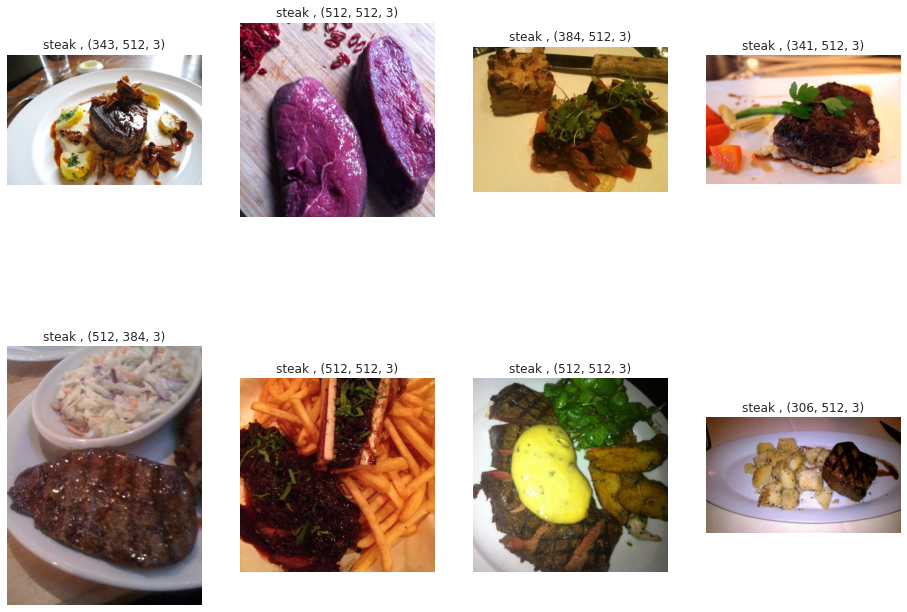

In [32]:
plt.figure(figsize = (16,12))
for i in range(8):
  plt.subplot(2,4,i+1)
  img = view_random_image(target_dir = 'pizza_steak/train', 
                        target_class = 'steak')

In [33]:
# Image Shape

"""
1. Neural Network work with value between 0 and 1
2. Common preprocessing involve scaling or normalizing pixbel value by dividing pixel array by the maximum pixel value
"""

img.shape # return width , height and color channels

(306, 512, 3)

# 2.0 End to End CNN Example
___

Steps to building the model:
1. Load images
2. Preprocess images
3. Build a CNN model to find pattern in images 
4. Compile the CNN model
5. Fit the CNN model


In [34]:
tf.random.set_seed(42)

# Step 0 : Preprocesing data
train_datagen = ImageDataGenerator(rescale = 1.0/255)
valid_datagen = ImageDataGenerator(rescale = 1.0/255)

# Setup path directory to stored image location
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Load data from file directory
train_data = train_datagen.flow_from_directory(directory = train_dir , 
                                            batch_size = 32,
                                            target_size = (224 , 224),
                                            class_mode = 'binary',
                                            seed = 42) #Take the path to a directory & generate batches of augmented data
                                            
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                               class_mode = 'binary',
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [41]:
# Step 1 : Build a model (Base on Tiny VGG on CNN explainer website)

"""
1. filters: Int, the dimensionality of the output space
2. kernel : An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
"""
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters = 10,   
                                                             kernel_size = 3,
                                                             activation  = 'relu',
                                                             input_shape = (224 , 224 , 3)),
                                      tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(pool_size = 2,
                                                                padding = 'valid'),
                                      tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
                                      tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1 , activation  = 'sigmoid')
])

# Step 2 : Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3 : Fit the model
history_1 = model_1.fit(train_data,
                        validation_data = valid_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(valid_data)) # batch size of 32. Total data size is 1500. Therefore len(data) = 1500/32

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 0.5520 - binary_accuracy: 0.7053 - val_loss: 0.3918 - val_binary_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4125 - binary_accuracy: 0.8147 - val_loss: 0.3156 - val_binary_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3737 - binary_accuracy: 0.8413 - val_loss: 0.3389 - val_binary_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3464 - binary_accuracy: 0.8520 - val_loss: 0.2905 - val_binary_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3095 - binary_accuracy: 0.8740 - val_loss: 0.3498 - val_binary_accuracy: 0.8580


In [44]:
# Model Summary
# Refer to CNN Explainer Website : poloclub.github.io/CNN-explainer/
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            